# Experimentación de dos variables

## Importando bibliotecas
- <b>Pandas</b>: Nos sirve para leer datos y filtrarlos.
- <b>Seaborn</b>: Es una biblioteca para graficar que nos permite interactuar con datos de Pandas.

- <i>Numpy y Matplotlib son dependencias de Pandas.</i>


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Leyendo resultados
Primero, leemos el archivo de resultados de ejecución de bt. Para esto, vamos a abrirlo con Pandas y guardarlo en un DataFrame (df).

In [6]:
df = pd.read_csv("tp2l/complejidades_array.csv")
df['t'] = df['tiempo']
print(df)

    fila  columna         tiempo              t
0      2        2       0.018404       0.018404
1      2       52       0.342845       0.342845
2      2      102       0.719634       0.719634
3      2      152       1.221380       1.221380
4      2      202       1.652190       1.652190
5      2      302       2.972370       2.972370
6      2      402       4.354130       4.354130
7      2      502       6.440940       6.440940
8     52        2       0.222593       0.222593
9     52       52      33.594400      33.594400
10    52      102     116.690000     116.690000
11    52      152     248.284000     248.284000
12    52      202     434.068000     434.068000
13    52      302     944.831000     944.831000
14    52      402    1671.410000    1671.410000
15    52      502    2564.360000    2564.360000
16   102        2       0.492517       0.492517
17   102       52     115.180000     115.180000
18   102      102     421.146000     421.146000
19   102      152     916.649000     916

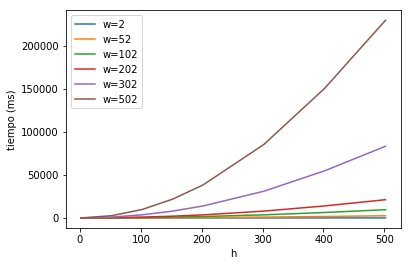

In [7]:
# Graficamos el tiempo en función de n, con series variando m.
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 2]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 52]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 102]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 152]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 302]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 502]);
ax1.legend(["w=2", "w=52", "w=102", "w=202" , "w=302" , "w=502" , ]);
plt.ylabel("tiempo (ms)");
plt.xlabel("h");

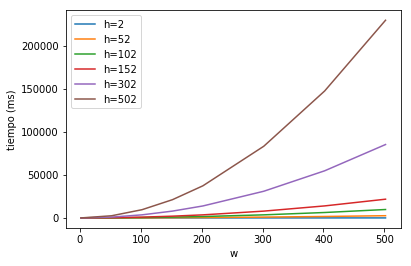

In [4]:
# Graficamos el tiempo en función de m, con series variando n.
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 2]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 52]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 102]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 152]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 302]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 502]);
ax1.legend(["h=2", "h=52", "h=102" , "h=152", "h=302", "h=502"]);
plt.ylabel("tiempo (ms)");
plt.xlabel("w");

Al igual que en $meet$-$in$-$the$-$middle$, y como mencionamos en el gráfico anterior, notamos un comportamiento errático para un mismo $n$ con distintos $W$. Esto refuerza nuestra hipótesis del párrafo anterior, por lo que utilizaremos la experimentación descrita para corroborarla o refutarla.

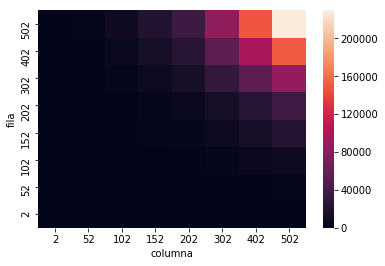

In [8]:
heat_df = df.pivot("fila", "columna", "t");
ax = sns.heatmap(heat_df)
ax.invert_yaxis()

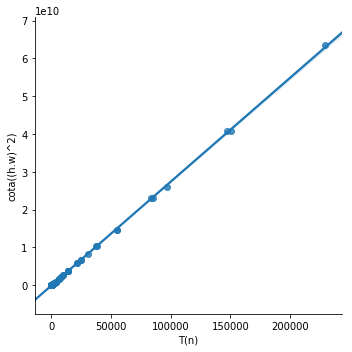

In [9]:
df["cota"] =((df["fila"])**2 * (df["columna"])**2);
# Grafico correlación.
ax1 = sns.lmplot(x='tiempo', y='cota', data=df);
plt.xlabel("T(n)");
plt.ylabel("cota((h.w)^2)");

In [10]:
df2 = df
r = np.corrcoef(df2["t"], df2["cota"])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))

El coeficiente de correlación de Pearson es: r=0.9999231445299285
